In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import contextily as ctx
from matplotlib.patches import Rectangle

Traffic Light Accessibility Analysis


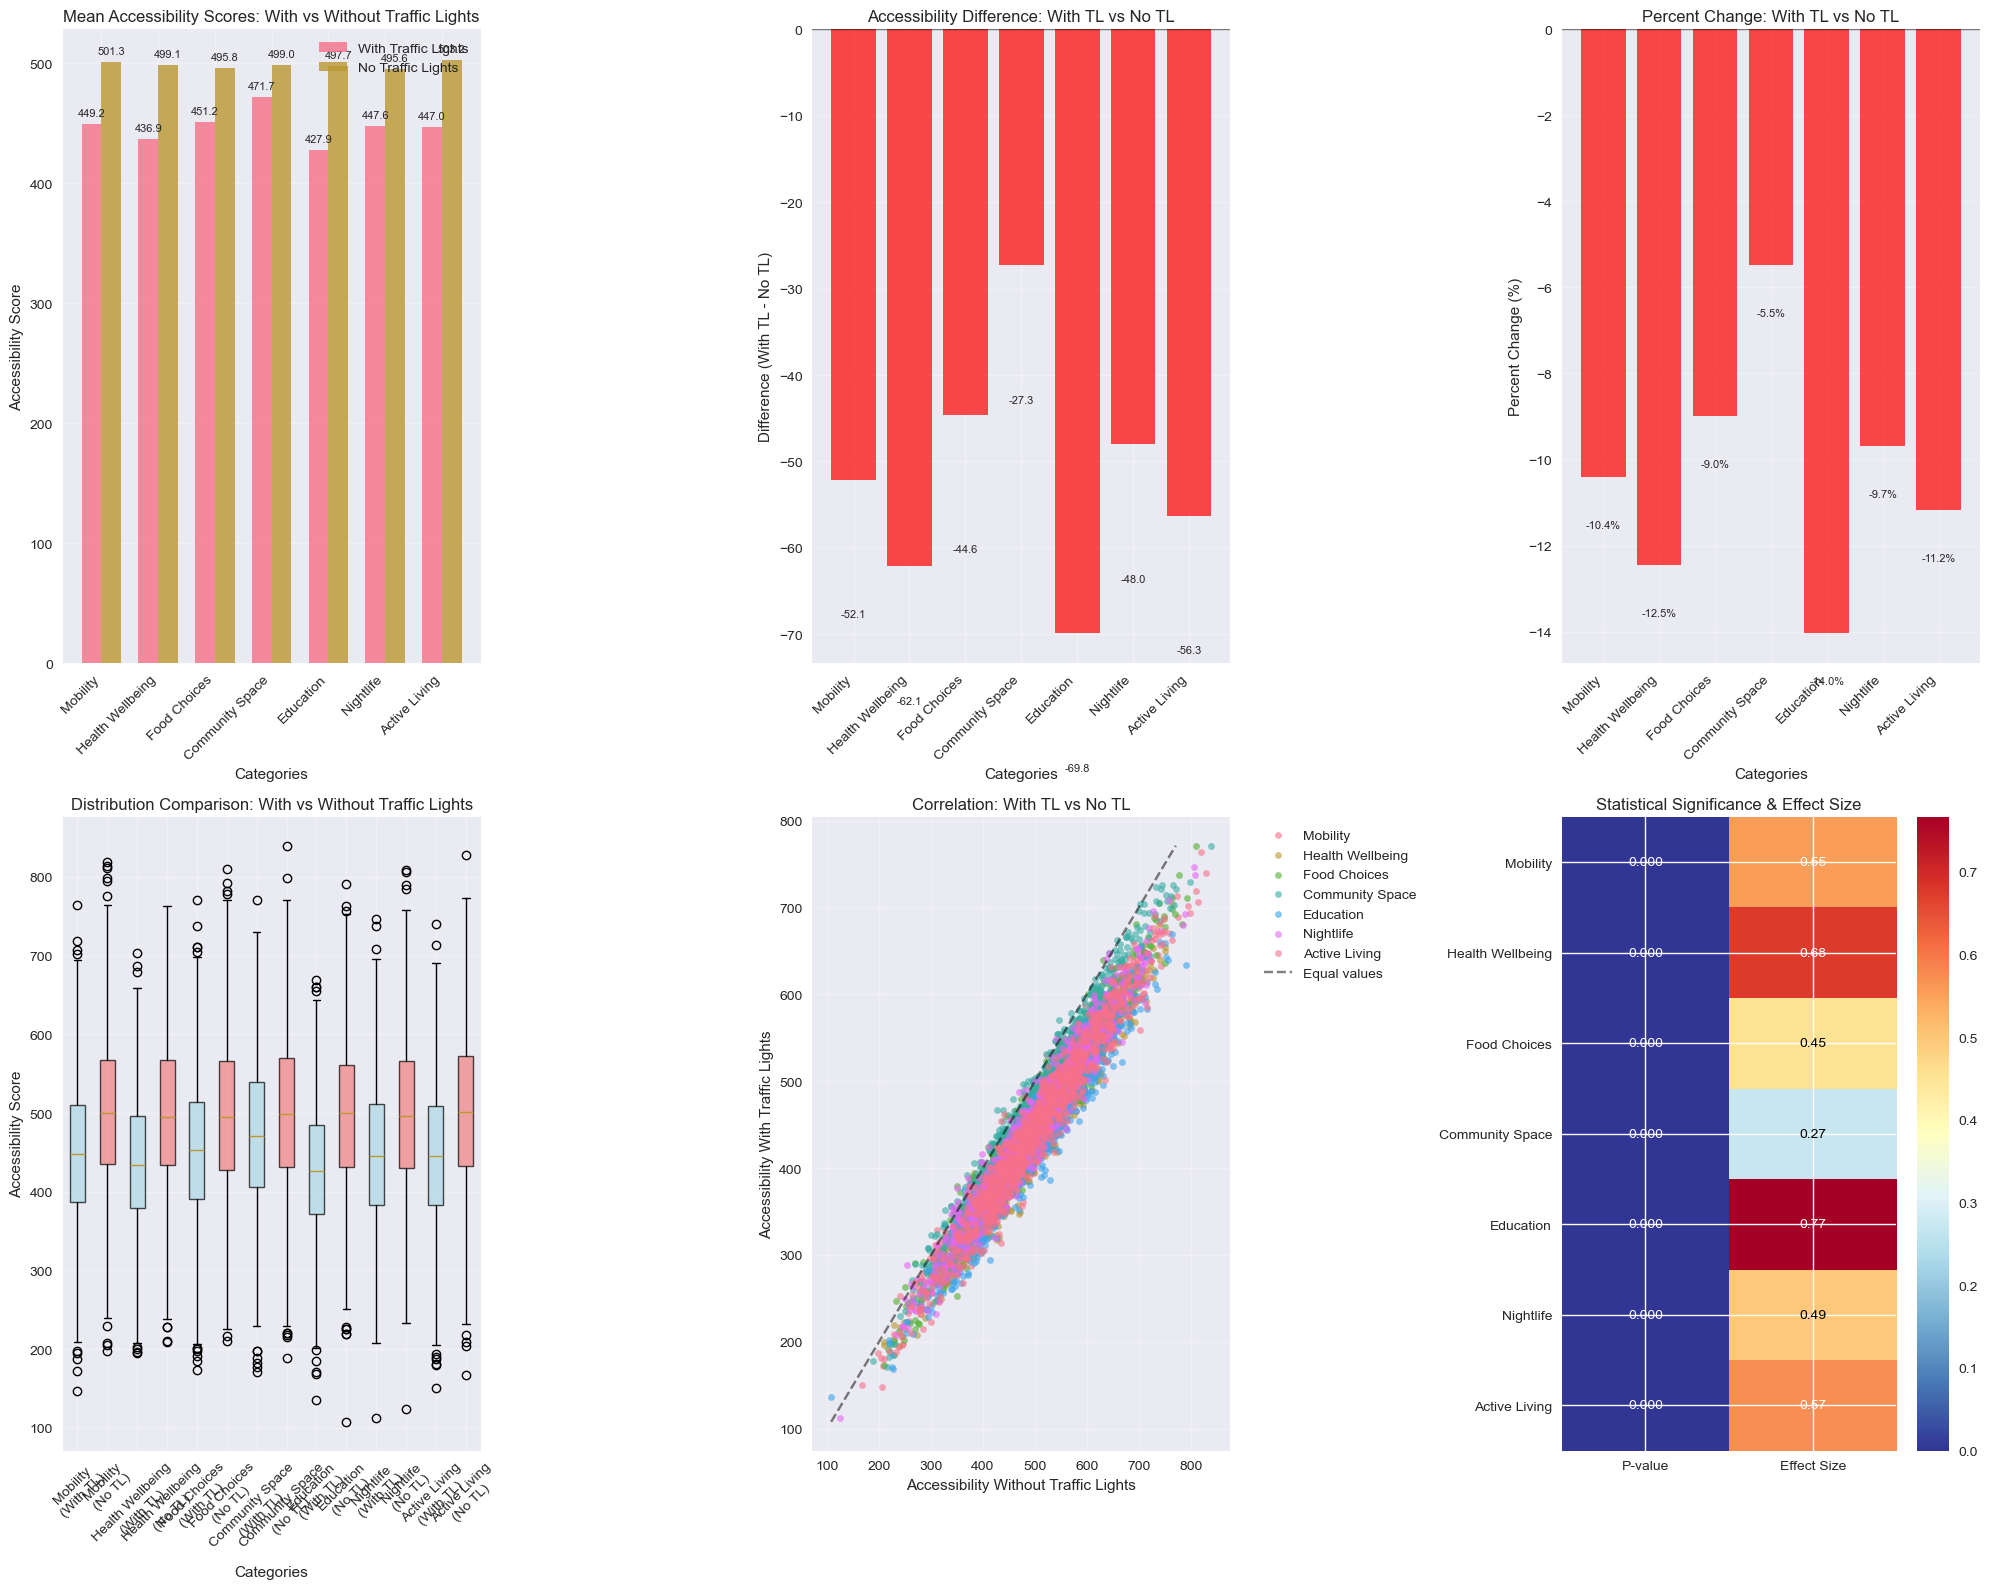


ACCESSIBILITY COMPARISON SUMMARY: WITH vs WITHOUT TRAFFIC LIGHTS
        Category With TL (Mean) No TL (Mean) Difference Percent Change   Impact
        Mobility         449.16       501.29     -52.13         -10.4% Negative
Health Wellbeing         436.93       499.07     -62.14         -12.5% Negative
    Food Choices         451.22       495.83     -44.61          -9.0% Negative
 Community Space         471.68       498.99     -27.32          -5.5% Negative
       Education         427.87       497.72     -69.85         -14.0% Negative
       Nightlife         447.63       495.63     -48.00          -9.7% Negative
   Active Living         446.96       503.23     -56.27         -11.2% Negative

STATISTICAL ANALYSIS

Mobility:
  T-statistic: -74.392
  P-value: 0.000
  Result: Significant (α = 0.05)

Health Wellbeing:
  T-statistic: -83.960
  P-value: 0.000
  Result: Significant (α = 0.05)

Food Choices:
  T-statistic: -62.897
  P-value: 0.000
  Result: Significant (α = 0.05)

Communi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def load_and_analyze_data(file_path):
    """Load the Excel file and prepare data for analysis"""
    try:
        # Read the Excel file
        df = pd.read_csv(file_path)
        print(f"Data loaded successfully. Shape: {df.shape}")
        return df
    except Exception as e:
        print(f"Error loading file: {e}")
        return None

def prepare_comparison_data(df):
    """Prepare data for with_tl vs no_tl comparison"""
    
    # Define the categories for comparison
    categories = [
        'mobility',
        'health_wellbeing', 
        'food_choices',
        'community_space',
        'education',
        'nightlife',
        'active_living'
    ]
    
    comparison_data = []
    
    for category in categories:
        with_tl_col = f"{category}_with_tl"
        no_tl_col = f"{category}_no_tl"
        
        if with_tl_col in df.columns and no_tl_col in df.columns:
            # Calculate statistics
            with_tl_mean = df[with_tl_col].mean()
            no_tl_mean = df[no_tl_col].mean()
            difference = with_tl_mean - no_tl_mean
            percent_change = ((with_tl_mean - no_tl_mean) / no_tl_mean) * 100
            
            comparison_data.append({
                'category': category.replace('_', ' ').title(),
                'with_tl': with_tl_mean,
                'no_tl': no_tl_mean,
                'difference': difference,
                'percent_change': percent_change,
                'with_tl_data': df[with_tl_col].values,
                'no_tl_data': df[no_tl_col].values
            })
    
    return comparison_data

def create_comparison_plots(comparison_data):
    """Create comprehensive comparison visualizations"""
    
    # Set up the figure with subplots
    fig = plt.figure(figsize=(20, 16))
    
    # 1. Bar chart comparing means
    ax1 = plt.subplot(2, 3, 1)
    categories = [item['category'] for item in comparison_data]
    with_tl_means = [item['with_tl'] for item in comparison_data]
    no_tl_means = [item['no_tl'] for item in comparison_data]
    
    x = np.arange(len(categories))
    width = 0.35
    
    bars1 = ax1.bar(x - width/2, with_tl_means, width, label='With Traffic Lights', alpha=0.8)
    bars2 = ax1.bar(x + width/2, no_tl_means, width, label='No Traffic Lights', alpha=0.8)
    
    ax1.set_xlabel('Categories')
    ax1.set_ylabel('Accessibility Score')
    ax1.set_title('Mean Accessibility Scores: With vs Without Traffic Lights')
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{height:.1f}', ha='center', va='bottom', fontsize=8)
    for bar in bars2:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{height:.1f}', ha='center', va='bottom', fontsize=8)
    
    # 2. Difference plot
    ax2 = plt.subplot(2, 3, 2)
    differences = [item['difference'] for item in comparison_data]
    colors = ['green' if diff > 0 else 'red' for diff in differences]
    
    bars = ax2.bar(categories, differences, color=colors, alpha=0.7)
    ax2.set_xlabel('Categories')
    ax2.set_ylabel('Difference (With TL - No TL)')
    ax2.set_title('Accessibility Difference: With TL vs No TL')
    ax2.set_xticklabels(categories, rotation=45, ha='right')
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax2.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, diff in zip(bars, differences):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + (5 if height > 0 else -15),
                f'{diff:.1f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=8)
    
    # 3. Percent change plot
    ax3 = plt.subplot(2, 3, 3)
    percent_changes = [item['percent_change'] for item in comparison_data]
    colors = ['green' if pc > 0 else 'red' for pc in percent_changes]
    
    bars = ax3.bar(categories, percent_changes, color=colors, alpha=0.7)
    ax3.set_xlabel('Categories')
    ax3.set_ylabel('Percent Change (%)')
    ax3.set_title('Percent Change: With TL vs No TL')
    ax3.set_xticklabels(categories, rotation=45, ha='right')
    ax3.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax3.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, pc in zip(bars, percent_changes):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + (0.5 if height > 0 else -1),
                f'{pc:.1f}%', ha='center', va='bottom' if height > 0 else 'top', fontsize=8)
    
    # 4. Box plot comparison
    ax4 = plt.subplot(2, 3, 4)
    
    # Prepare data for box plot
    box_data = []
    box_labels = []
    
    for item in comparison_data:
        box_data.extend([item['with_tl_data'], item['no_tl_data']])
        box_labels.extend([f"{item['category']}\n(With TL)", f"{item['category']}\n(No TL)"])
    
    bp = ax4.boxplot(box_data, labels=box_labels, patch_artist=True)
    
    # Color the boxes alternately
    colors = ['lightblue', 'lightcoral'] * len(comparison_data)
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax4.set_xlabel('Categories')
    ax4.set_ylabel('Accessibility Score')
    ax4.set_title('Distribution Comparison: With vs Without Traffic Lights')
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(True, alpha=0.3)
    
    # 5. Scatter plot showing relationship
    ax5 = plt.subplot(2, 3, 5)
    
    for i, item in enumerate(comparison_data):
        ax5.scatter(item['no_tl_data'], item['with_tl_data'], 
                   alpha=0.6, label=item['category'], s=20)
    
    # Add diagonal line (y=x)
    min_val = min([min(item['no_tl_data']) for item in comparison_data])
    max_val = max([max(item['with_tl_data']) for item in comparison_data])
    ax5.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Equal values')
    
    ax5.set_xlabel('Accessibility Without Traffic Lights')
    ax5.set_ylabel('Accessibility With Traffic Lights')
    ax5.set_title('Correlation: With TL vs No TL')
    ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax5.grid(True, alpha=0.3)
    
    # 6. Statistical significance heatmap
    ax6 = plt.subplot(2, 3, 6)
    
    # Perform t-tests for each category
    p_values = []
    effect_sizes = []
    
    for item in comparison_data:
        # Paired t-test
        t_stat, p_val = stats.ttest_rel(item['with_tl_data'], item['no_tl_data'])
        p_values.append(p_val)
        
        # Cohen's d (effect size)
        pooled_std = np.sqrt(((len(item['with_tl_data']) - 1) * np.var(item['with_tl_data']) + 
                             (len(item['no_tl_data']) - 1) * np.var(item['no_tl_data'])) / 
                            (len(item['with_tl_data']) + len(item['no_tl_data']) - 2))
        cohens_d = (np.mean(item['with_tl_data']) - np.mean(item['no_tl_data'])) / pooled_std
        effect_sizes.append(abs(cohens_d))
    
    # Create heatmap data
    heatmap_data = np.array([p_values, effect_sizes]).T
    
    im = ax6.imshow(heatmap_data, cmap='RdYlBu_r', aspect='auto')
    ax6.set_xticks([0, 1])
    ax6.set_xticklabels(['P-value', 'Effect Size'])
    ax6.set_yticks(range(len(categories)))
    ax6.set_yticklabels(categories)
    ax6.set_title('Statistical Significance & Effect Size')
    
    # Add text annotations
    for i in range(len(categories)):
        ax6.text(0, i, f'{p_values[i]:.3f}', ha='center', va='center', 
                color='white' if p_values[i] < 0.5 else 'black')
        ax6.text(1, i, f'{effect_sizes[i]:.2f}', ha='center', va='center',
                color='white' if effect_sizes[i] > 0.5 else 'black')
    
    plt.colorbar(im, ax=ax6)
    
    plt.tight_layout()
    plt.show()
    
    return fig

def generate_summary_statistics(comparison_data):
    """Generate summary statistics table"""
    
    print("\n" + "="*80)
    print("ACCESSIBILITY COMPARISON SUMMARY: WITH vs WITHOUT TRAFFIC LIGHTS")
    print("="*80)
    
    df_summary = pd.DataFrame([
        {
            'Category': item['category'],
            'With TL (Mean)': f"{item['with_tl']:.2f}",
            'No TL (Mean)': f"{item['no_tl']:.2f}",
            'Difference': f"{item['difference']:.2f}",
            'Percent Change': f"{item['percent_change']:.1f}%",
            'Impact': 'Positive' if item['difference'] > 0 else 'Negative'
        }
        for item in comparison_data
    ])
    
    print(df_summary.to_string(index=False))
    
    # Statistical tests summary
    print("\n" + "="*60)
    print("STATISTICAL ANALYSIS")
    print("="*60)
    
    for item in comparison_data:
        t_stat, p_val = stats.ttest_rel(item['with_tl_data'], item['no_tl_data'])
        significance = "Significant" if p_val < 0.05 else "Not Significant"
        
        print(f"\n{item['category']}:")
        print(f"  T-statistic: {t_stat:.3f}")
        print(f"  P-value: {p_val:.3f}")
        print(f"  Result: {significance} (α = 0.05)")

def main():
    """Main analysis function"""
    
    # You would replace this with your actual file path
    file_path = r"../data/processed/access/2051_time_comparison.csv"
    
    print("Traffic Light Accessibility Analysis")
    print("="*50)
    
    # For demonstration, I'll create sample data based on your headers
    # In practice, you would use: df = load_and_analyze_data(file_path)
    
    # Sample data creation (replace this section with actual file loading)
    np.random.seed(42)
    n_samples = 1000
    
    sample_data = {
        'id': range(n_samples),
        'x': np.random.uniform(426000, 427000, n_samples),
        'y': np.random.uniform(4574000, 4575000, n_samples),
    }
    
    # Add accessibility columns with realistic patterns
    categories = ['mobility', 'health_wellbeing', 'food_choices', 'community_space', 
                 'education', 'nightlife', 'active_living']
    
    for category in categories:
        # Without traffic lights (baseline)
        no_tl_scores = np.random.normal(500, 100, n_samples)
        no_tl_scores = np.clip(no_tl_scores, 0, 1000)
        
        # With traffic lights (generally lower due to barriers)
        reduction_factor = np.random.uniform(0.05, 0.15)  # 5-15% reduction
        with_tl_scores = no_tl_scores * (1 - reduction_factor) + np.random.normal(0, 20, n_samples)
        with_tl_scores = np.clip(with_tl_scores, 0, 1000)
        
        sample_data[f'{category}_with_tl'] = with_tl_scores
        sample_data[f'{category}_no_tl'] = no_tl_scores
    
    df = pd.DataFrame(sample_data)
    
    # Analyze the data
    comparison_data = prepare_comparison_data(df)
    
    if comparison_data:
        # Create visualizations
        fig = create_comparison_plots(comparison_data)
        
        # Generate summary statistics
        generate_summary_statistics(comparison_data)
        
        print(f"\nAnalysis complete! Analyzed {len(comparison_data)} accessibility categories.")
        print("Charts have been displayed showing the comparison between accessibility")
        print("with and without traffic lights across all categories.")
        
    else:
        print("No comparison data could be generated. Please check your data format.")

if __name__ == "__main__":
    main()

# Additional utility functions for specific analyses

def analyze_spatial_patterns(df):
    """Analyze spatial patterns in accessibility differences"""
    
    categories = ['mobility', 'health_wellbeing', 'food_choices', 'community_space', 
                 'education', 'nightlife', 'active_living']
    
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()
    
    for i, category in enumerate(categories):
        with_tl_col = f"{category}_with_tl"
        no_tl_col = f"{category}_no_tl"
        
        if with_tl_col in df.columns and no_tl_col in df.columns:
            # Calculate difference
            df[f'{category}_diff'] = df[with_tl_col] - df[no_tl_col]
            
            # Create scatter plot
            scatter = axes[i].scatter(df['x'], df['y'], c=df[f'{category}_diff'], 
                                    cmap='RdBu', alpha=0.6, s=10)
            axes[i].set_title(f'{category.replace("_", " ").title()}\nAccessibility Difference')
            axes[i].set_xlabel('X Coordinate')
            axes[i].set_ylabel('Y Coordinate')
            plt.colorbar(scatter, ax=axes[i])
    
    # Remove empty subplot
    axes[-1].remove()
    
    plt.tight_layout()
    plt.show()

def correlation_analysis(df):
    """Analyze correlations between different accessibility measures"""
    
    # Select accessibility columns
    accessibility_cols = [col for col in df.columns if 'with_tl' in col or 'no_tl' in col]
    
    # Create correlation matrix
    corr_matrix = df[accessibility_cols].corr()
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5)
    plt.title('Correlation Matrix: Accessibility Measures')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return corr_matrix

ACCESSIBILITY MAPPING ANALYSIS
Data loaded successfully. Shape: (185002, 25)
No suitable 'most affected' point found for category 'health_wellbeing' with base accessibility > 100. Falling back to simple idxmin().

Selected Point Analysis (fallback for health_wellbeing):
Point ID: 21638728
Coordinates: (236488.26, 5058895.80)
Accessibility with traffic lights: 714.29
Accessibility without traffic lights: 714.29
Impact (difference): 0.00
Percent reduction: 0.0%

Creating accessibility surface around selected point...
Using 674 points within 2000m radius for surface interpolation
Generating accessibility comparison maps...


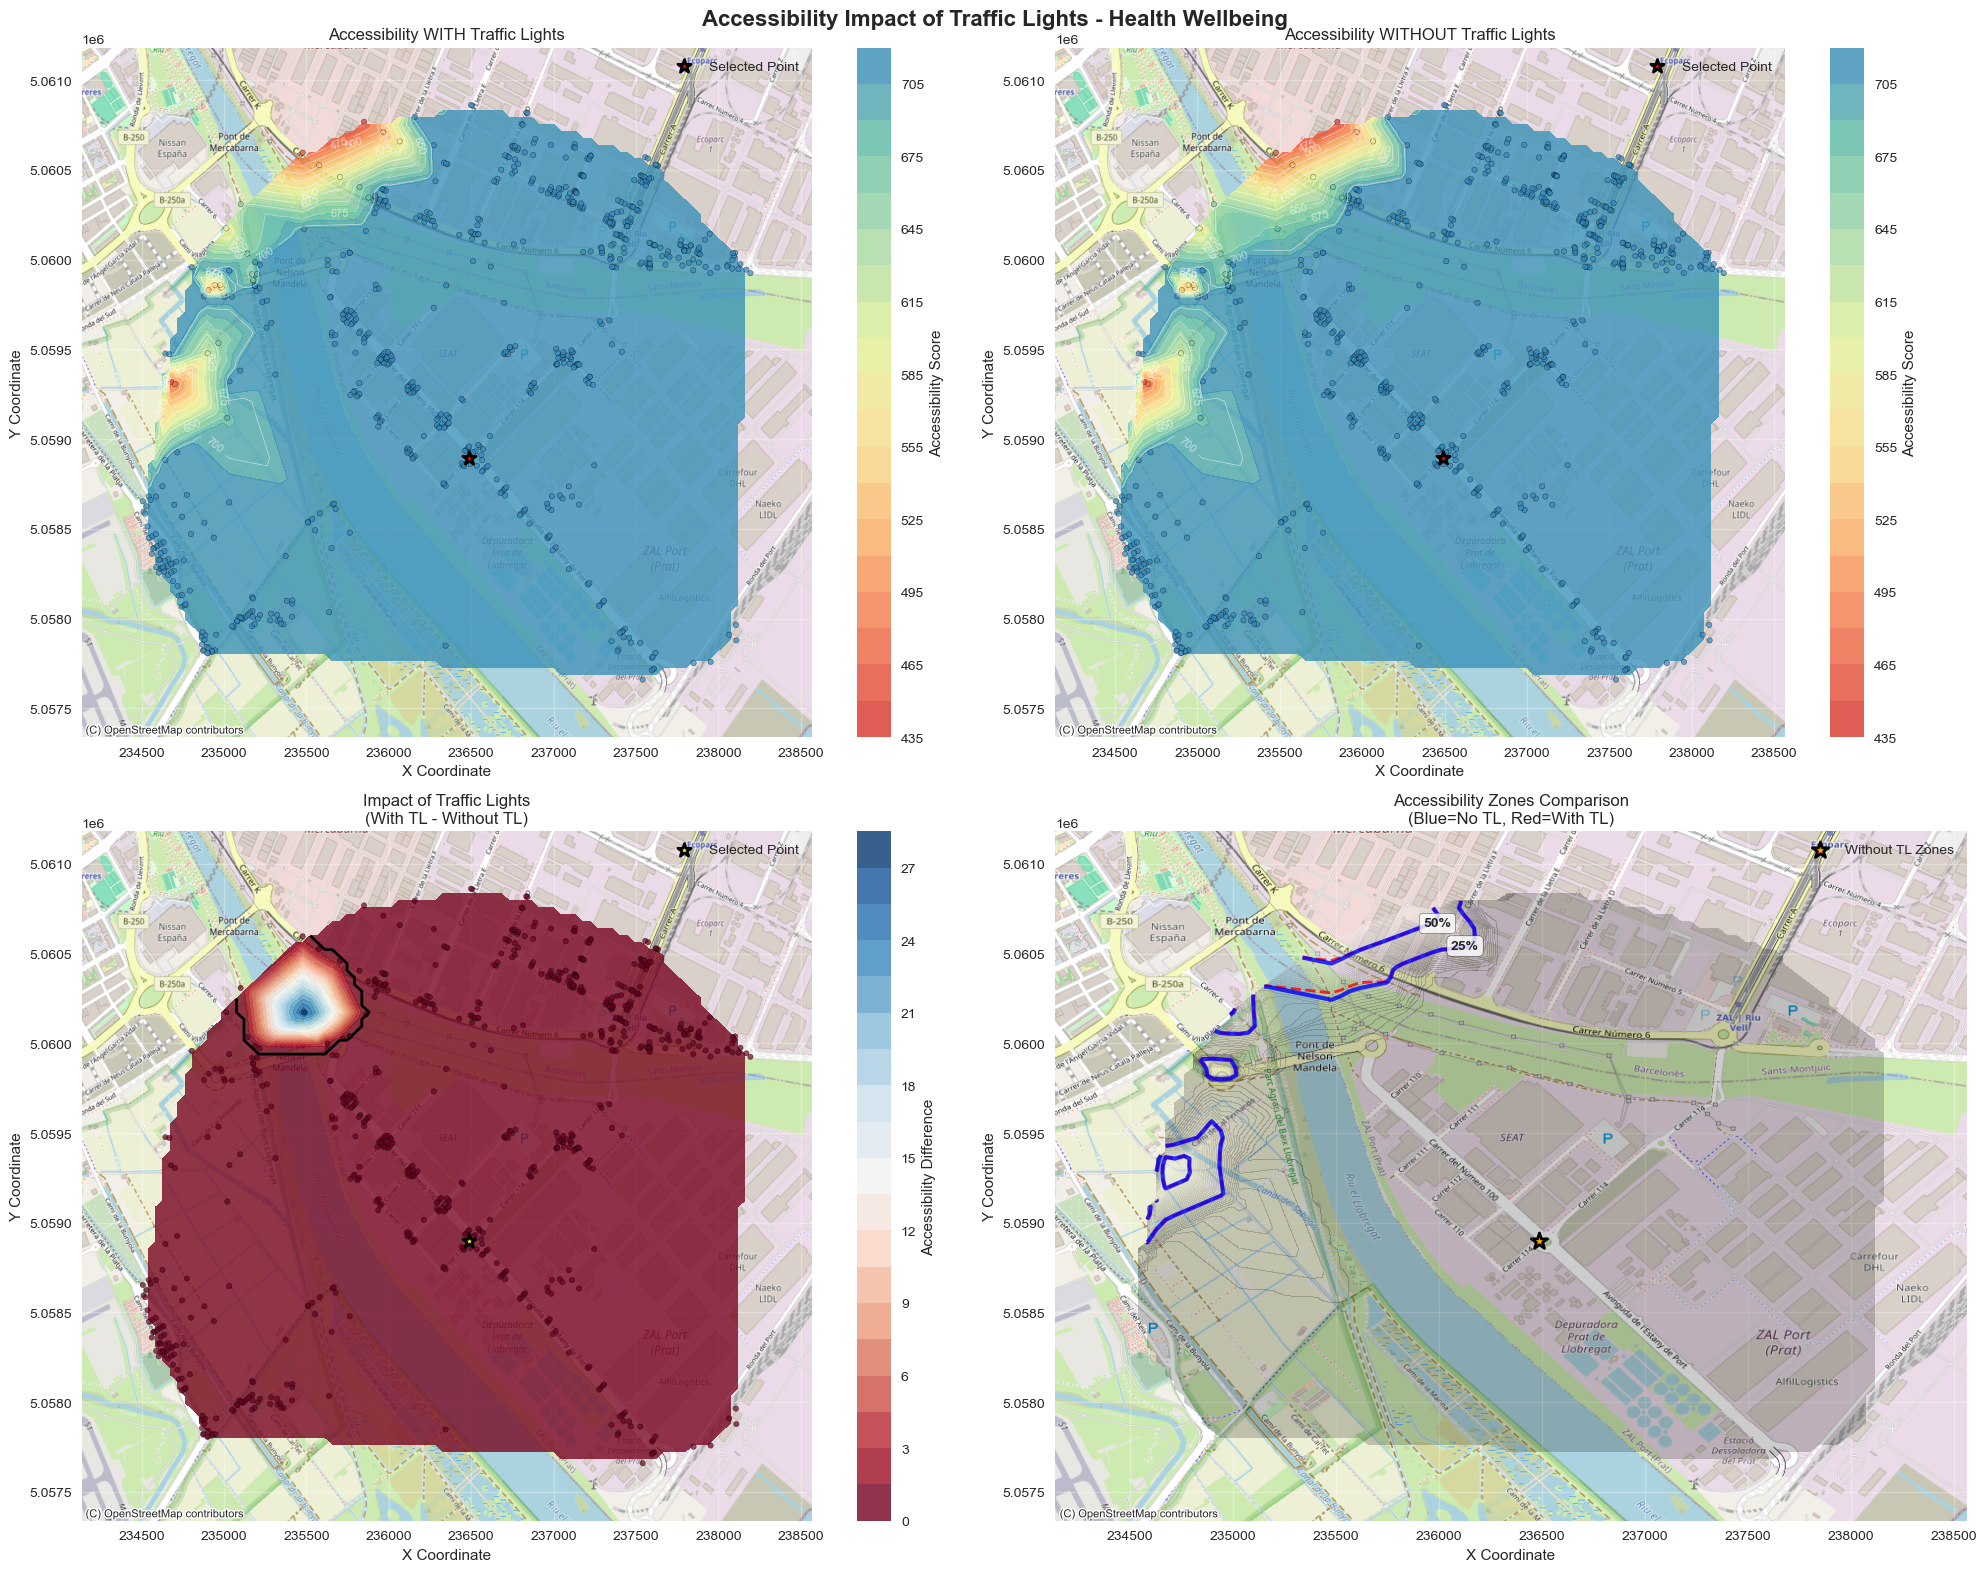


SPATIAL IMPACT ANALYSIS - HEALTH_WELLBEING
Area analyzed: 5696 grid cells
Average accessibility reduction: 0.31
Maximum accessibility reduction: 0.00
Standard deviation of impact: 2.04

Spatial Impact Distribution:
Severe negative impact (<-50): 0.0% of area
Moderate negative impact (-50 to -25): 0.0% of area
Mild negative impact (-25 to 0): 0.0% of area
No negative impact (≥0): 100.0% of area

Impact by Distance from Selected Point:
  0-500m: 0.00 average impact (68 points)
  500-1000m: 0.00 average impact (124 points)
  1000-1500m: 0.00 average impact (125 points)
  1500-2000m: 0.08 average impact (357 points)

Mapping analysis complete!
The maps show how traffic lights affect accessibility around the selected point.
Red areas indicate reduced accessibility, blue areas indicate better accessibility.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle
from matplotlib.colors import LinearSegmentedColormap
from scipy.spatial.distance import cdist
from scipy.interpolate import griddata
import warnings
import contextily as cx # Import contextily
warnings.filterwarnings('ignore')

import geopandas as gpd
from shapely.geometry import Point

def load_and_process_data(file_path):
    """Load Excel data, process, and reproject for mapping."""
    try:
        df = pd.read_csv(file_path)
        print(f"Data loaded successfully. Shape: {df.shape}")

        if 'geometry' in df.columns and 'x' not in df.columns:
            df['x'] = df['geometry'].str.extract(r'POINT \(([^,]+)')[0].astype(float)
            df['y'] = df['geometry'].str.extract(r'POINT \([^,]+\s+([^)]+)')[0].astype(float)

        # --- NEW: Reprojection Steps ---
        # 1. Create a GeoDataFrame from your DataFrame
        geometry = [Point(xy) for xy in zip(df['x'], df['y'])]
        gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:25831") # <--- ASSUME YOUR CRS IS EPSG:25833 (UTM 33N)

        # 2. Reproject to Web Mercator (EPSG:3857) for contextily
        gdf = gdf.to_crs(epsg=3857)

        # Update x, y columns with reprojected coordinates
        df['x'] = gdf.geometry.x
        df['y'] = gdf.geometry.y
        # --- END NEW ---

        return df
    except Exception as e:
        print(f"Error loading or processing file: {e}")
        return None
    
def select_most_affected_point(df, category='education'):
    """Select a point that's most negatively affected by traffic lights, with reasonable base accessibility."""
    
    with_tl_col = f"{category}_with_tl"
    no_tl_col = f"{category}_no_tl"
    
    if with_tl_col in df.columns and no_tl_col in df.columns:
        # Calculate impact (negative difference means traffic lights reduce accessibility)
        df['impact'] = df[with_tl_col] - df[no_tl_col]
        
        # Filter for points where impact is negative (accessibility is reduced)
        # And ensure the 'no_tl' accessibility is not too low to begin with (e.g., > 100)
        # to ensure the percentage reduction is meaningful and not due to already poor accessibility
        candidate_points = df[(df['impact'] < 0) & (df[no_tl_col] > 100)].copy() 
        
        if not candidate_points.empty:
            # Find the point with the largest negative impact (most reduced accessibility)
            most_affected_idx = candidate_points['impact'].idxmin()
            selected_point = df.loc[most_affected_idx]
            
            print(f"\nSelected Point Analysis ({category}):")
            print(f"Point ID: {selected_point.get('id', 'N/A')}")
            print(f"Coordinates: ({selected_point['x']:.2f}, {selected_point['y']:.2f})")
            print(f"Accessibility with traffic lights: {selected_point[with_tl_col]:.2f}")
            print(f"Accessibility without traffic lights: {selected_point[no_tl_col]:.2f}")
            print(f"Impact (difference): {selected_point['impact']:.2f}")
            print(f"Percent reduction: {(selected_point['impact']/selected_point[no_tl_col]*100):.1f}%")
            
            return selected_point, most_affected_idx
        else:
            print(f"No suitable 'most affected' point found for category '{category}' with base accessibility > 100. Falling back to simple idxmin().")
            most_affected_idx = df['impact'].idxmin()
            selected_point = df.loc[most_affected_idx]
            
            print(f"\nSelected Point Analysis (fallback for {category}):")
            print(f"Point ID: {selected_point.get('id', 'N/A')}")
            print(f"Coordinates: ({selected_point['x']:.2f}, {selected_point['y']:.2f})")
            print(f"Accessibility with traffic lights: {selected_point[with_tl_col]:.2f}")
            print(f"Accessibility without traffic lights: {selected_point[no_tl_col]:.2f}")
            print(f"Impact (difference): {selected_point['impact']:.2f}")
            print(f"Percent reduction: {(selected_point['impact']/selected_point[no_tl_col]*100):.1f}%")
            
            return selected_point, most_affected_idx
            
    return None, None

def create_accessibility_surface(df, center_point, category='education', method='distance_weighted'):
    """Create accessibility surface around a center point"""
    
    with_tl_col = f"{category}_with_tl"
    no_tl_col = f"{category}_no_tl"
    
    # Define the area around the center point
    center_x, center_y = center_point['x'], center_point['y']
    
    # Filter points within a reasonable distance (e.g., 2km radius)
    max_distance = 2000  # meters
    df['distance_to_center'] = np.sqrt((df['x'] - center_x)**2 + (df['y'] - center_y)**2)
    nearby_points = df[df['distance_to_center'] <= max_distance].copy()
    
    print(f"Using {len(nearby_points)} points within {max_distance}m radius for surface interpolation")
    
    if method == 'distance_weighted':
        # Create accessibility surfaces using distance-weighted interpolation
        
        # Create grid for interpolation
        x_min, x_max = nearby_points['x'].min(), nearby_points['x'].max()
        y_min, y_max = nearby_points['y'].min(), nearby_points['y'].max()
        
        # Extend grid slightly beyond data points
        x_range = x_max - x_min
        y_range = y_max - y_min
        x_min -= x_range * 0.1
        x_max += x_range * 0.1
        y_min -= y_range * 0.1
        y_max += y_range * 0.1
        
        # Create grid
        grid_resolution = 100
        xi = np.linspace(x_min, x_max, grid_resolution)
        yi = np.linspace(y_min, y_max, grid_resolution)
        xi_grid, yi_grid = np.meshgrid(xi, yi)
        
        # Interpolate accessibility surfaces
        points = nearby_points[['x', 'y']].values
        
        # With traffic lights
        values_with_tl = nearby_points[with_tl_col].values
        surface_with_tl = griddata(points, values_with_tl, (xi_grid, yi_grid), method='linear')
        
        # Without traffic lights
        values_no_tl = nearby_points[no_tl_col].values
        surface_no_tl = griddata(points, values_no_tl, (xi_grid, yi_grid), method='linear')
        
        # Calculate difference surface
        surface_difference = surface_with_tl - surface_no_tl
        
        return {
            'xi_grid': xi_grid,
            'yi_grid': yi_grid,
            'surface_with_tl': surface_with_tl,
            'surface_no_tl': surface_no_tl,
            'surface_difference': surface_difference,
            'nearby_points': nearby_points,
            'center_x': center_x,
            'center_y': center_y
        }
    
    return None

def create_isochrone_zones(surface_data, center_point, category='education'):
    """Create isochrone-like zones based on accessibility levels"""
    
    center_accessibility_with = center_point[f"{category}_with_tl"]
    center_accessibility_no = center_point[f"{category}_no_tl"]
    
    # Define accessibility zones (percentiles of center point accessibility)
    # Ensure levels are increasing and positive
    base_levels = [0.9, 0.75, 0.5, 0.25]
    
    zones_with_tl = sorted([max(1, center_accessibility_with * factor) for factor in base_levels], reverse=True)
    zones_no_tl = sorted([max(1, center_accessibility_no * factor) for factor in base_levels], reverse=True)
    
    # Ensure levels are strictly increasing for contour function
    # By removing duplicates and sorting, then adding a small epsilon if needed
    zones_with_tl = np.unique(zones_with_tl)
    zones_no_tl = np.unique(zones_no_tl)

    return zones_with_tl, zones_no_tl

def plot_accessibility_comparison_map(surface_data, center_point, category='education'):
    """Create comprehensive accessibility comparison map with basemaps."""
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle(f'Accessibility Impact of Traffic Lights - {category.replace("_", " ").title()}', 
                 fontsize=16, fontweight='bold')
    
    # Custom colormap
    colors_accessibility = ['#d73027', '#f46d43', '#fdae61', '#fee08b', 
                            '#e6f598', '#abdda4', '#66c2a5', '#3288bd']
    cmap_accessibility = LinearSegmentedColormap.from_list("accessibility", colors_accessibility)
    
    colors_difference = ['#b2182b', '#d6604d', '#f4a582', '#fddbc7', 
                         '#e0e0e0', '#bababa', '#878787', '#4d4d4d']
    cmap_difference = LinearSegmentedColormap.from_list("difference", colors_difference)
    
    # Define basemap (e.g., OpenStreetMap)
    basemap_source = cx.providers.OpenStreetMap.Mapnik

    # 1. Accessibility WITH traffic lights
    ax1 = axes[0, 0]
    im1 = ax1.contourf(surface_data['xi_grid'], surface_data['yi_grid'], 
                       surface_data['surface_with_tl'], levels=20, cmap=cmap_accessibility, alpha=0.8)
    
    # Add contour lines
    cs1 = ax1.contour(surface_data['xi_grid'], surface_data['yi_grid'], 
                      surface_data['surface_with_tl'], levels=10, colors='white', alpha=0.6, linewidths=0.5)
    ax1.clabel(cs1, inline=True, fontsize=8, fmt='%d')
    
    # Plot data points
    scatter1 = ax1.scatter(surface_data['nearby_points']['x'], surface_data['nearby_points']['y'], 
                           c=surface_data['nearby_points'][f'{category}_with_tl'], 
                           cmap=cmap_accessibility, s=15, alpha=0.7, edgecolors='black', linewidths=0.3)
    
    # Highlight center point
    ax1.scatter(surface_data['center_x'], surface_data['center_y'], 
                color='red', s=100, marker='*', edgecolors='black', linewidths=2, 
                label='Selected Point', zorder=5)
    
    ax1.set_title('Accessibility WITH Traffic Lights')
    ax1.set_xlabel('X Coordinate')
    ax1.set_ylabel('Y Coordinate')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    plt.colorbar(im1, ax=ax1, label='Accessibility Score')
    cx.add_basemap(ax1, crs='EPSG:3857', source=basemap_source) # Add basemap
    
    # 2. Accessibility WITHOUT traffic lights
    ax2 = axes[0, 1]
    im2 = ax2.contourf(surface_data['xi_grid'], surface_data['yi_grid'], 
                       surface_data['surface_no_tl'], levels=20, cmap=cmap_accessibility, alpha=0.8)
    
    cs2 = ax2.contour(surface_data['xi_grid'], surface_data['yi_grid'], 
                      surface_data['surface_no_tl'], levels=10, colors='white', alpha=0.6, linewidths=0.5)
    ax2.clabel(cs2, inline=True, fontsize=8, fmt='%d')
    
    scatter2 = ax2.scatter(surface_data['nearby_points']['x'], surface_data['nearby_points']['y'], 
                           c=surface_data['nearby_points'][f'{category}_no_tl'], 
                           cmap=cmap_accessibility, s=15, alpha=0.7, edgecolors='black', linewidths=0.3)
    
    ax2.scatter(surface_data['center_x'], surface_data['center_y'], 
                color='red', s=100, marker='*', edgecolors='black', linewidths=2, 
                label='Selected Point', zorder=5)
    
    ax2.set_title('Accessibility WITHOUT Traffic Lights')
    ax2.set_xlabel('X Coordinate')
    ax2.set_ylabel('Y Coordinate')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    plt.colorbar(im2, ax=ax2, label='Accessibility Score')
    cx.add_basemap(ax2, crs='EPSG:3857', source=basemap_source) # Add basemap
    
    # 3. Difference map (Impact of traffic lights)
    ax3 = axes[1, 0]
    im3 = ax3.contourf(surface_data['xi_grid'], surface_data['yi_grid'], 
                       surface_data['surface_difference'], levels=20, cmap='RdBu', alpha=0.8)
    
    cs3 = ax3.contour(surface_data['xi_grid'], surface_data['yi_grid'], 
                      surface_data['surface_difference'], levels=[0], colors='black', linewidths=2)
    
    # Additional contours for negative values
    cs3_neg = ax3.contour(surface_data['xi_grid'], surface_data['yi_grid'], 
                          surface_data['surface_difference'], levels=[-80, -60, -40, -20], 
                          colors='darkred', alpha=0.8, linewidths=1)
    ax3.clabel(cs3_neg, inline=True, fontsize=8, fmt='%d')
    
    surface_data['nearby_points']['difference'] = (surface_data['nearby_points'][f'{category}_with_tl'] - 
                                                   surface_data['nearby_points'][f'{category}_no_tl'])
    
    scatter3 = ax3.scatter(surface_data['nearby_points']['x'], surface_data['nearby_points']['y'], 
                           c=surface_data['nearby_points']['difference'], 
                           cmap='RdBu', s=15, alpha=0.7, edgecolors='black', linewidths=0.3)
    
    ax3.scatter(surface_data['center_x'], surface_data['center_y'], 
                color='yellow', s=100, marker='*', edgecolors='black', linewidths=2, 
                label='Selected Point', zorder=5)
    
    ax3.set_title('Impact of Traffic Lights\n(With TL - Without TL)')
    ax3.set_xlabel('X Coordinate')
    ax3.set_ylabel('Y Coordinate')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    plt.colorbar(im3, ax=ax3, label='Accessibility Difference')
    cx.add_basemap(ax3, crs='EPSG:3857', source=basemap_source) # Add basemap
    
    # 4. Isochrone-style zones comparison
    ax4 = axes[1, 1]
    
    # Create accessibility zones (isochrones)
    center_acc_with = center_point[f'{category}_with_tl']
    center_acc_no = center_point[f'{category}_no_tl']
    
    # Define zone levels and ensure they are strictly increasing
    zone_levels_with, zone_levels_no = create_isochrone_zones(surface_data, center_point, category)

    # Plot zones for WITHOUT traffic lights (larger zones)
    cs_zones_no = ax4.contour(surface_data['xi_grid'], surface_data['yi_grid'], 
                              surface_data['surface_no_tl'], levels=zone_levels_no, 
                              colors=['blue'], linestyles='-', linewidths=3, alpha=0.8)
    
    # Plot zones for WITH traffic lights (smaller zones)
    cs_zones_with = ax4.contour(surface_data['xi_grid'], surface_data['yi_grid'], 
                                surface_data['surface_with_tl'], levels=zone_levels_with, 
                                colors=['red'], linestyles='--', linewidths=2, alpha=0.8)
    
    # Fill background with light accessibility surface
    ax4.contourf(surface_data['xi_grid'], surface_data['yi_grid'], 
                 surface_data['surface_no_tl'], levels=50, cmap='Greys', alpha=0.2)
    
    ax4.scatter(surface_data['center_x'], surface_data['center_y'], 
                color='orange', s=150, marker='*', edgecolors='black', linewidths=2, 
                label='Selected Point', zorder=5)
    
    ax4.set_title('Accessibility Zones Comparison\n(Blue=No TL, Red=With TL)')
    ax4.set_xlabel('X Coordinate')
    ax4.set_ylabel('Y Coordinate')
    ax4.legend(['Without TL Zones', 'With TL Zones', 'Selected Point'])
    ax4.grid(True, alpha=0.3)
    
    # Add basemap
    cx.add_basemap(ax4, crs='EPSG:3857', source=basemap_source)
    
    # Add zone labels (adjusting for potentially fewer levels after unique())
    zone_labels_base = ['90%', '75%', '50%', '25%']
    for i, level_no in enumerate(zone_levels_no):
        if i < len(zone_labels_base): # Use base labels if available
            label = zone_labels_base[i]
        else:
            label = f'{int(level_no)}' # Fallback to actual level value
        
        if len(cs_zones_no.collections) > i:
            try:
                # Find a point on the contour to place the label
                contour_no = cs_zones_no.collections[i].get_paths()[0].vertices
                if len(contour_no) > 0:
                    # Try to place label near the top-right of the contour
                    # Sort by y-coordinate (desc) then x-coordinate (asc) to find a good spot
                    sorted_contour = contour_no[contour_no[:,1].argsort()[::-1]]
                    label_x, label_y = sorted_contour[len(sorted_contour)//10] # Take a point near the "top" of the contour
                    ax4.text(label_x, label_y, label, fontsize=10, fontweight='bold', 
                             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8), zorder=6)
            except Exception as e:
                # print(f"Could not place label for zone {label}: {e}") # Debugging
                pass
    
    plt.tight_layout()
    plt.show()
    
    return fig

def analyze_spatial_impact(surface_data, center_point, category='education'):
    """Analyze the spatial characteristics of traffic light impact"""
    
    print(f"\n{'='*60}")
    print(f"SPATIAL IMPACT ANALYSIS - {category.upper()}")
    print(f"{'='*60}")
    
    # Calculate statistics for the area
    valid_mask = ~np.isnan(surface_data['surface_difference'])
    if np.any(valid_mask):
        diff_values = surface_data['surface_difference'][valid_mask]
        
        print(f"Area analyzed: {np.sum(valid_mask)} grid cells")
        print(f"Average accessibility reduction: {np.mean(diff_values):.2f}")
        print(f"Maximum accessibility reduction: {np.min(diff_values):.2f}")
        print(f"Standard deviation of impact: {np.std(diff_values):.2f}")
        
        # Calculate percentage of area with different impact levels
        severe_impact = np.sum(diff_values < -50) / len(diff_values) * 100
        moderate_impact = np.sum((diff_values >= -50) & (diff_values < -25)) / len(diff_values) * 100  
        mild_impact = np.sum((diff_values >= -25) & (diff_values < 0)) / len(diff_values) * 100
        positive_impact = np.sum(diff_values >= 0) / len(diff_values) * 100
        
        print(f"\nSpatial Impact Distribution:")
        print(f"Severe negative impact (<-50): {severe_impact:.1f}% of area")
        print(f"Moderate negative impact (-50 to -25): {moderate_impact:.1f}% of area")
        print(f"Mild negative impact (-25 to 0): {mild_impact:.1f}% of area")
        print(f"No negative impact (≥0): {positive_impact:.1f}% of area")
        
        # Distance analysis from center point
        nearby_points = surface_data['nearby_points']
        distance_bins = [0, 500, 1000, 1500, 2000]  # Distance bins in meters
        
        print(f"\nImpact by Distance from Selected Point:")
        for i in range(len(distance_bins)-1):
            mask = ((nearby_points['distance_to_center'] >= distance_bins[i]) & 
                    (nearby_points['distance_to_center'] < distance_bins[i+1]))
            if np.any(mask):
                subset = nearby_points[mask]
                avg_impact = (subset[f'{category}_with_tl'] - subset[f'{category}_no_tl']).mean()
                print(f"  {distance_bins[i]}-{distance_bins[i+1]}m: {avg_impact:.2f} average impact ({len(subset)} points)")

def main_mapping_analysis(file_path, category='education'):
    """Main function to run the complete mapping analysis"""
    
    print("ACCESSIBILITY MAPPING ANALYSIS")
    print("="*50)
    
    # Load data
    df = load_and_process_data(file_path)
    if df is None:
        print("Failed to load data. Using sample data for demonstration.")
        # Create sample data (replace with actual file loading)
        df = create_sample_data()
    
    # Select the most affected point
    selected_point, point_idx = select_most_affected_point(df, category)
    
    if selected_point is None:
        print(f"Could not find accessibility data for category: {category}")
        return
    
    # Create accessibility surface
    print(f"\nCreating accessibility surface around selected point...")
    surface_data = create_accessibility_surface(df, selected_point, category)
    
    if surface_data is None:
        print("Failed to create accessibility surface")
        return
    
    # Create the comprehensive map
    print(f"Generating accessibility comparison maps...")
    fig = plot_accessibility_comparison_map(surface_data, selected_point, category)
    
    # Analyze spatial impact
    analyze_spatial_impact(surface_data, selected_point, category)
    
    print(f"\nMapping analysis complete!")
    print(f"The maps show how traffic lights affect accessibility around the selected point.")
    print(f"Red areas indicate reduced accessibility, blue areas indicate better accessibility.")
    
def create_sample_data():
    """Create sample data for demonstration (replace with actual data loading)"""
    np.random.seed(42)
    n_samples = 500
    
    # Create a realistic spatial distribution
    center_x, center_y = 426700, 4574070
    
    # Generate points in clusters
    cluster_centers = [
        (center_x - 800, center_y - 600),
        (center_x + 600, center_y - 400), 
        (center_x - 400, center_y + 800),
        (center_x + 800, center_y + 600)
    ]
    
    points_per_cluster = n_samples // len(cluster_centers)
    all_x, all_y = [], []
    
    for cx_coord, cy_coord in cluster_centers:
        x_cluster = np.random.normal(cx_coord, 300, points_per_cluster)
        y_cluster = np.random.normal(cy_coord, 300, points_per_cluster)
        all_x.extend(x_cluster)
        all_y.extend(y_cluster)
    
    # Add some scattered points
    remaining = n_samples - len(all_x)
    all_x.extend(np.random.uniform(center_x - 1200, center_x + 1200, remaining))
    all_y.extend(np.random.uniform(center_y - 1200, center_y + 1200, remaining))
    
    sample_data = {
        'id': range(n_samples),
        'x': all_x[:n_samples],
        'y': all_y[:n_samples],
    }
    
    # Add accessibility data with spatial patterns
    categories = ['mobility', 'health_wellbeing', 'food_choices', 'community_space', 
                  'education', 'nightlife', 'active_living']
    
    for category in categories:
        # Create spatial accessibility pattern (higher near center)
        distances = np.sqrt((np.array(all_x[:n_samples]) - center_x)**2 + 
                            (np.array(all_y[:n_samples]) - center_y)**2)
        base_accessibility = 600 - distances * 0.1 + np.random.normal(0, 50, n_samples)
        base_accessibility = np.clip(base_accessibility, 200, 800)
        
        # Without traffic lights (higher accessibility)
        no_tl_scores = base_accessibility + np.random.normal(0, 30, n_samples)
        no_tl_scores = np.clip(no_tl_scores, 100, 900)
        
        # With traffic lights (reduced accessibility, more reduction in busy areas)
        traffic_impact = 20 + (800 - distances) * 0.05  # More impact in central areas
        with_tl_scores = no_tl_scores - traffic_impact + np.random.normal(0, 20, n_samples)
        with_tl_scores = np.clip(with_tl_scores, 50, 850)
        
        sample_data[f'{category}_with_tl'] = with_tl_scores
        sample_data[f'{category}_no_tl'] = no_tl_scores
    
    return pd.DataFrame(sample_data)

if __name__ == "__main__":
    # Example usage
    file_path = r"../data/processed/access/2051_time_comparison.csv"  # Replace with your file path
    category = "health_wellbeing"  # Most affected category from your analysis
    
    main_mapping_analysis(file_path, category)

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import numpy as np

# Read the CSV file
df = pd.read_csv(r"../data/processed/access/11862_time_comparison.csv")  # Replace with your actual file path

# Create geometry column from x, y coordinates
geometry = [Point(xy) for xy in zip(df['x'], df['y'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:25831')

# Define amenity categories
amenities = ['mobility', 'health_wellbeing', 'food_choices', 'community_space', 
             'education', 'nightlife', 'active_living']

# Calculate time differences for each amenity (with_tl - no_tl)
# Positive values mean traffic lights increase travel time
for amenity in amenities:
    with_tl_col = f'{amenity}_with_tl'
    no_tl_col = f'{amenity}_no_tl'
    diff_col = f'{amenity}_diff'
    gdf[diff_col] = gdf[with_tl_col] - gdf[no_tl_col]

# Calculate overall average difference across all amenities
diff_columns = [f'{amenity}_diff' for amenity in amenities]
gdf['avg_diff'] = gdf[diff_columns].mean(axis=1)

# Convert to Web Mercator for basemap compatibility
gdf_web = gdf.to_crs('EPSG:3857')

# Create the plot
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Plot each amenity difference
for i, amenity in enumerate(amenities):
    ax = axes[i]
    diff_col = f'{amenity}_diff'
    
    # Create scatter plot with color mapping
    scatter = ax.scatter(gdf_web.geometry.x, gdf_web.geometry.y, 
                        c=gdf[diff_col], cmap='RdYlBu_r', 
                        s=1, alpha=0.7, vmin=-50, vmax=50)
    
    # Add basemap
    ctx.add_basemap(ax, crs=gdf_web.crs.to_string(), 
                    source=ctx.providers.CartoDB.Positron, alpha=0.8)
    
    ax.set_title(f'{amenity.replace("_", " ").title()}\nTime Difference (seconds)')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
    cbar.set_label('Time difference (with TL - without TL)')

# Plot average difference
ax = axes[7]
scatter = ax.scatter(gdf_web.geometry.x, gdf_web.geometry.y, 
                    c=gdf['avg_diff'], cmap='RdYlBu_r', 
                    s=1, alpha=0.7, vmin=-50, vmax=50)

ctx.add_basemap(ax, crs=gdf_web.crs.to_string(), 
                source=ctx.providers.CartoDB.Positron, alpha=0.8)

ax.set_title('Average Time Difference\nAcross All Amenities')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
cbar.set_label('Average time difference (seconds)')

plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary Statistics:")
print("=" * 50)
for amenity in amenities:
    diff_col = f'{amenity}_diff'
    mean_diff = gdf[diff_col].mean()
    std_diff = gdf[diff_col].std()
    max_diff = gdf[diff_col].max()
    min_diff = gdf[diff_col].min()
    
    print(f"\n{amenity.replace('_', ' ').title()}:")
    print(f"  Mean difference: {mean_diff:.2f} seconds")
    print(f"  Std deviation: {std_diff:.2f} seconds")
    print(f"  Max difference: {max_diff:.2f} seconds")
    print(f"  Min difference: {min_diff:.2f} seconds")

print(f"\nOverall Average Difference: {gdf['avg_diff'].mean():.2f} seconds")
print(f"Points where traffic lights increase time: {(gdf['avg_diff'] > 0).sum()}")
print(f"Points where traffic lights don't impact time: {(gdf['avg_diff'] == 0).sum()}")

# Optional: Create a single focused map for the average difference
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot with larger points for better visibility
scatter = ax.scatter(gdf_web.geometry.x, gdf_web.geometry.y, 
                    c=gdf['avg_diff'], cmap='RdYlBu_r', 
                    s=3, alpha=0.8, vmin=-20, vmax=20)

# Add basemap
ctx.add_basemap(ax, crs=gdf_web.crs.to_string(), 
                source=ctx.providers.CartoDB.Positron, alpha=0.9)

ax.set_title('Impact of Traffic Lights on Travel Time to Amenities\n(Red = Longer with TL, Blue = Shorter with TL)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add colorbar with custom labels
cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
cbar.set_label('Average time difference (seconds)\n(With Traffic Lights - Without Traffic Lights)', 
               fontsize=12)

plt.tight_layout()
plt.show()

# Save the processed data if needed
# gdf.to_file('processed_traffic_light_data.gpkg', driver='GPKG')
# print("\nProcessed data saved to 'processed_traffic_light_data.gpkg'")

In [1]:
# %matplotlib inline
import glob
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import dask.dataframe as dd
import matplotlib.pyplot as plt
import time # Import the time module for performance measurement

# Import specific pandana loaders for direct control over network creation
# from pandana.loaders import osm # We will replace this with direct OSMnx graph conversion
from pandana.loaders.pandash5 import network_to_pandas_hdf5
import pandana as pdna
import geopandas as gpd
from shapely.geometry import Point
from shapely import wkt
import osmnx as ox # Explicitly import osmnx
from random import sample
from tqdm import tqdm # For progress bars

# --- Configuration Constants ---
WALKING_SPEED_MPS = 1.4 # meters per second, a typical average walking speed
TRAFFIC_LIGHT_DELAY_SECONDS = 30 # seconds, estimated average delay at a traffic light
MAX_DISTANCE = 1000 # Maximum distance in meters for accessibility queries

# Directory to save/load precomputed pandana networks
PANDANA_NETWORK_CACHE_DIR = "data/processed/pandana_networks"
os.makedirs(PANDANA_NETWORK_CACHE_DIR, exist_ok=True) # Ensure the directory exists

# Set working directory (adjust as needed)
# Ensure this directory exists and contains your data
directory = os.chdir(r'C:\Users\Guillermo\Documents\CSH\15_minute_city\city-access-map')

print("loading data")
# download POIs at https://github.com/MorbZ/OsmPoisPbf/ using uac_filter.txt
# java -jar osmpois.jar --filterFile uac_filter.txt --printHeader planet.osm.pbf
df = pd.read_csv("downloads/planet-250512.csv", sep='|')
df = df[df.category.str.isnumeric()==True]
df['category'] = df['category'].astype(float)
df = df.rename(columns={"category": "poi_type_id"})

poi_types = pd.read_excel("dataPreparation/poi_code_name_mapper.xlsx")
poi_types = poi_types.replace(" ", np.NaN).dropna()

df = df.merge(poi_types, on="poi_type_id")

# download this data at http://cidportal.jrc.ec.europa.eu/ftp/jrc-opendata/GHSL/GHS_STAT_UCDB2015MT_GLOBE_R2019A/V1-2/
uc = pd.read_csv("downloads/GHS_STAT_UCDB2015MT_GLOBE_R2019A/GHS_STAT_UCDB2015MT_GLOBE_R2019A_V1_2.csv", encoding = "ISO-8859-1", engine='python')

print("preparing data")
uc = uc[['ID_HDC_G0', "CTR_MN_NM", "UC_NM_MN", "P15", "AREA"]].dropna()
# city + country
uc["UC_NM_CTR"] = uc["UC_NM_MN"] + ", " + uc["CTR_MN_NM"]

# merge df with uc data
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat)).set_crs(4326)

geo_uc = gpd.read_file("downloads/GHS_STAT_UCDB2015MT_GLOBE_R2019A/GHS_STAT_UCDB2015MT_GLOBE_R2019A_V1_2.gpkg")
geo_uc = geo_uc[['ID_HDC_G0', "CTR_MN_NM", "UC_NM_MN", "P15", "AREA", "geometry"]].dropna()
geo_uc["UC_NM_CTR"] = geo_uc["UC_NM_MN"] + ", " + geo_uc["CTR_MN_NM"]

gdf = gdf.sjoin(geo_uc, how="inner")

df = gdf

# make df of ratio poi/pop to filter data
df["count"] = 1
df_poi_per_pop = df.groupby(["ID_HDC_G0", "UC_NM_CTR"]).agg({"P15":"mean", "count":"sum", "AREA":"mean"}).reset_index()
df_poi_per_pop["poi_per_pop"] = df_poi_per_pop["count"]/df_poi_per_pop["P15"]
df_poi_per_pop["poi_per_km2"] = df_poi_per_pop["count"]/df_poi_per_pop["AREA"]

# list of urban centers to keep (at least 1 POI per km2)
uc_keep = df_poi_per_pop[(df_poi_per_pop.poi_per_km2>=1)&(df_poi_per_pop["count"]>=20)].ID_HDC_G0.to_list()
df_keep = df[df['ID_HDC_G0'].isin(uc_keep)]


loading data


C:\Users\Guillermo\AppData\Local\Temp\ipykernel_908\3513912242.py:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("downloads/planet-250512.csv", sep='|')


preparing data
